In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [13]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
dt_classifier=DecisionTreeClassifier(max_depth=3, random_state=42, criterion='gini')
dt_classifier

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
dt_classifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
dt_classifier.get_depth()

3

In [18]:
dt_classifier.get_n_leaves()

np.int64(5)

<function matplotlib.pyplot.show(close=None, block=None)>

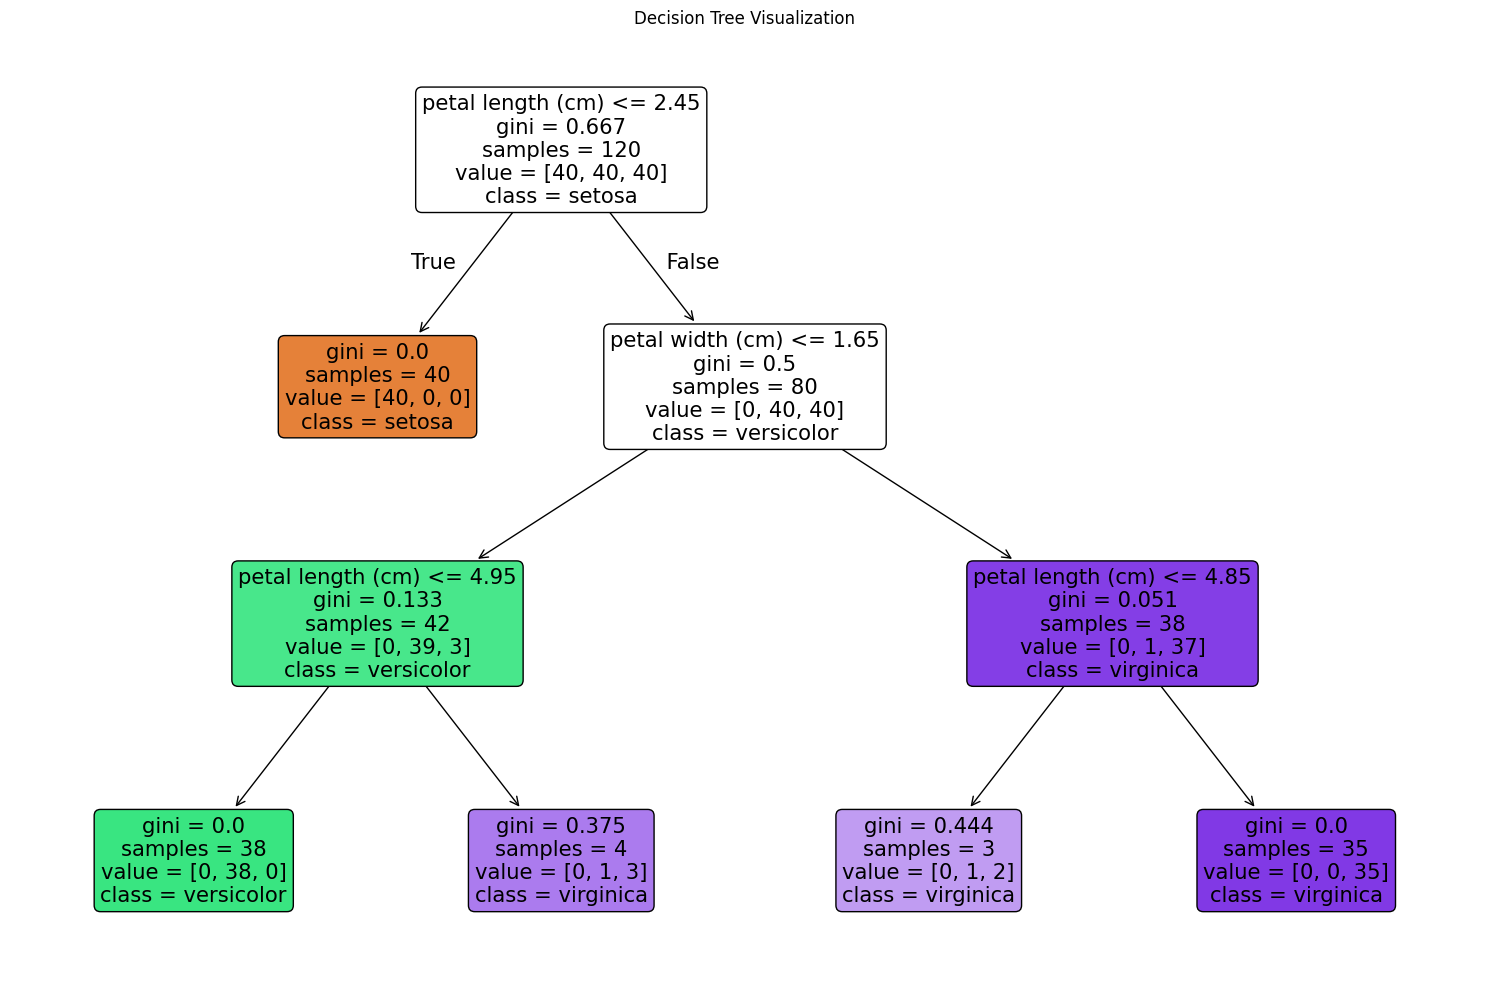

In [19]:
plt.figure(figsize=(15,10))

plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show

In [20]:
y_pred = dt_classifier.predict(X_test)

for i in range(5):
    actual_name = y_test.iloc[i]
    predicted_name = y_pred[i]
    print(f"Actual:{actual_name}, Predicted: {predicted_name}")


Actual:setosa, Predicted: setosa
Actual:virginica, Predicted: virginica
Actual:versicolor, Predicted: versicolor
Actual:versicolor, Predicted: versicolor
Actual:setosa, Predicted: setosa


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



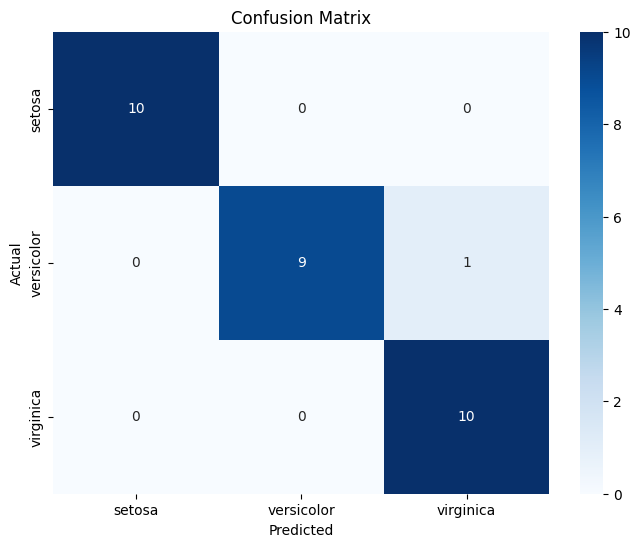

In [24]:
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", classification_rep)

cm= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
features= dt_classifier.feature_importances_
feature_names = iris.feature_names

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': features})
feature_importance_df

,Feature,Importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
2,petal length (cm),0.579077
3,petal width (cm),0.420923


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)



In [29]:
y_pred = dt_classifier.predict(X_test)

for i in range(5):
    actual_name = y_test.iloc[i]
    predicted_name = y_pred[i]
    print(f"Actual:{actual_name}, Predicted: {predicted_name}")

    accuracy_score(y_test, y_pred_rf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Classifier Accurancy: {accuracy_rf:.2f}")

Actual:setosa, Predicted: setosa
Random Forest Classifier Accurancy: 0.97
Actual:virginica, Predicted: virginica
Random Forest Classifier Accurancy: 0.97
Actual:versicolor, Predicted: versicolor
Random Forest Classifier Accurancy: 0.97
Actual:versicolor, Predicted: versicolor
Random Forest Classifier Accurancy: 0.97
Actual:setosa, Predicted: setosa
Random Forest Classifier Accurancy: 0.97


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



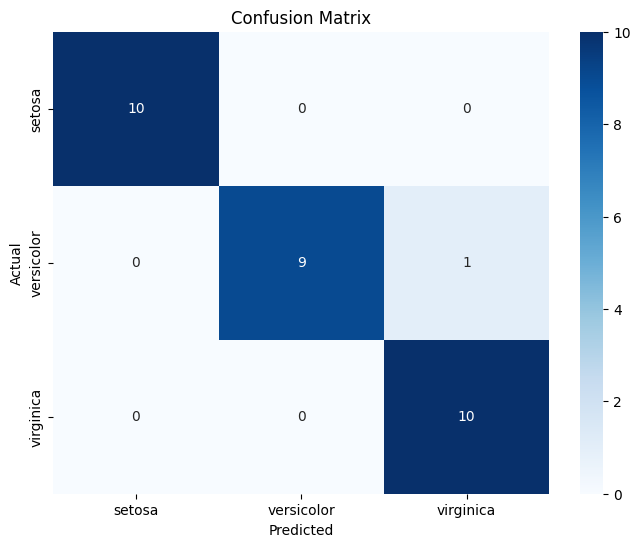

In [30]:
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", classification_rep)

cm= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
features_rf= rf_classifier.feature_importances_
feature_names_rf = iris.feature_names

feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': features_rf})
feature_importance_df_rf

,Feature,Importance
0,sepal length (cm),0.114307
1,sepal width (cm),0.005764
2,petal length (cm),0.440338
3,petal width (cm),0.439591


In [33]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train,y_train)
ada_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)
y_pred_ada = ada_classifier.predict(X_test)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print("Accuracy(Gradient Boosting):", accuracy_gb)
print("Accuracy(AdaBoost):", accuracy_ada)

for i in range(5):
    actual_name = y_test.iloc[i]
    predicted_name = y_pred_gb[i]
    print